In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Data Preprocess
1. Drop nan value
2. Drop the value that the 'gender == Other'
3. Convert Categories to numbers
4. Split the Dataset into train set and test set

In [7]:
# Step 1: Drop nan value
df = df.dropna()

In [8]:
# Step 2: Drop the value that the 'gender == Other'
df = df.loc[df['gender'] != 'Other']

In [9]:
# Step 3: Convert Categories to numbers
df['gender'] = df.iloc[:,1].astype('category').cat.codes
df['ever_married'] = df.iloc[:,5].astype('category').cat.codes
df['work_type'] = df.iloc[:,6].astype('category').cat.codes
df['Residence_type'] = df.iloc[:,7].astype('category').cat.codes
df['smoking_status'] = df.iloc[:,10].astype('category').cat.codes

In [10]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   int8   
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   int8   
 6   work_type          4908 non-null   int8   
 7   Residence_type     4908 non-null   int8   
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   int8   
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), int8(5)
memory usage: 330.7 KB


In [12]:
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
# Step 4: Split the Dataset into train set and test set
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Feature Selection

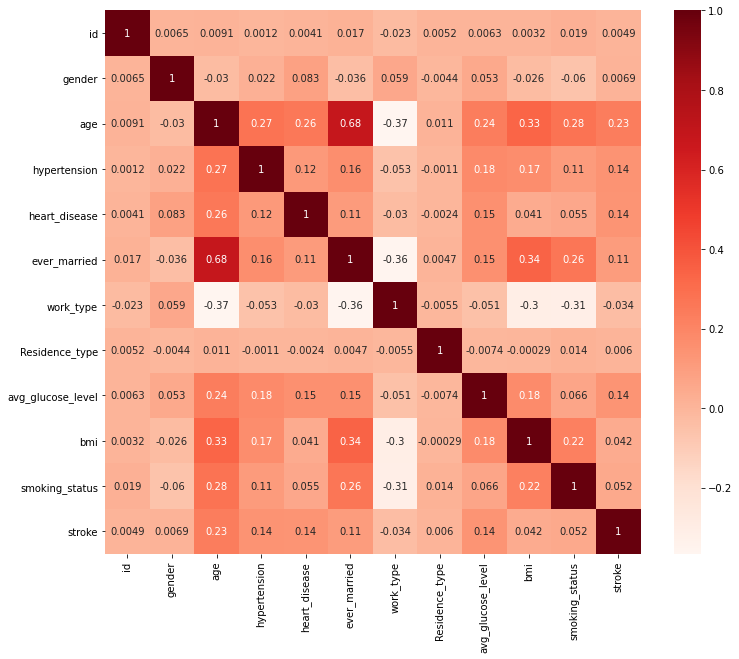

In [14]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
#Correlation with output variable
cor_target = abs(cor["stroke"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

age                  0.232313
hypertension         0.142503
heart_disease        0.137929
ever_married         0.105051
avg_glucose_level    0.138984
stroke               1.000000
Name: stroke, dtype: float64

In [16]:
df=df[['age','hypertension','heart_disease','ever_married','avg_glucose_level','stroke']]

In [17]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [18]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.8
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(x, y)

In [19]:
X_res['stroke']=y_res

In [20]:
data=X_res

In [21]:
data

,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke
0,52.0,0,0,0,69.37,0
1,19.0,0,0,0,56.33,0
2,29.0,0,0,0,73.63,0
3,81.0,1,0,1,58.71,0
4,78.0,0,0,1,143.47,0
...,...,...,...,...,...,...
465,72.0,0,0,1,97.92,1
466,45.0,0,0,1,224.10,1
467,77.0,1,0,1,199.84,1
468,82.0,0,1,1,208.30,1


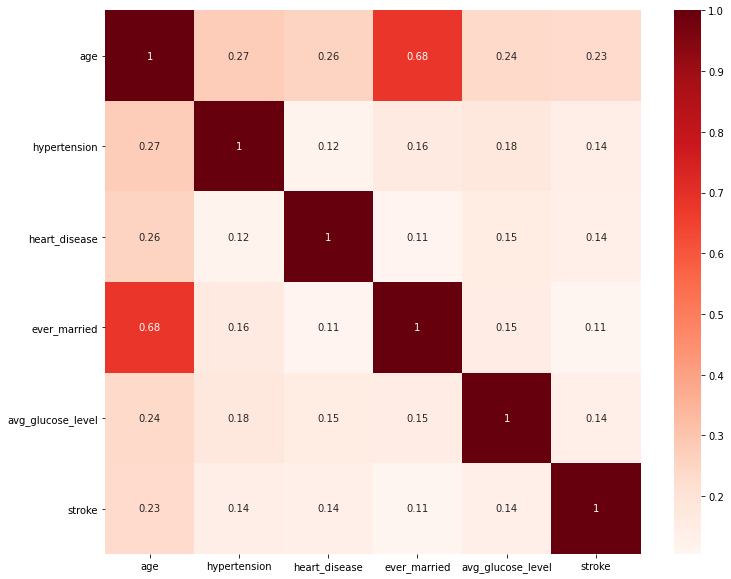

In [22]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

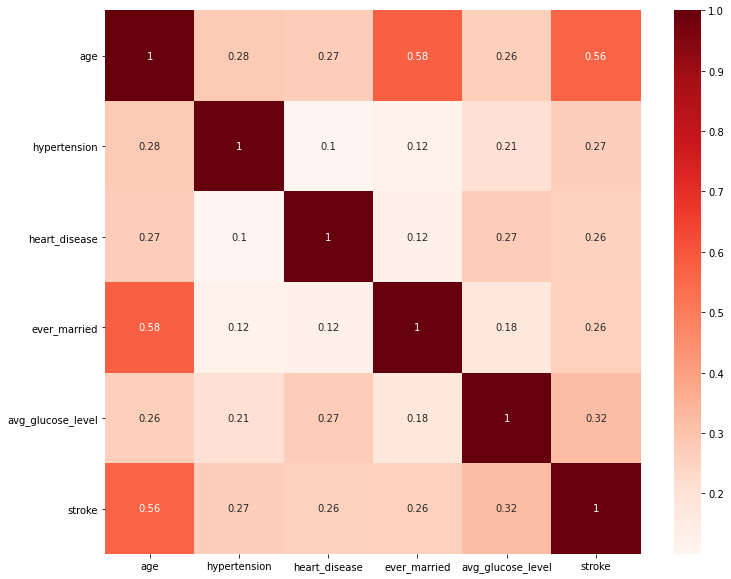

In [23]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [24]:
data['stroke'].value_counts()

0    261
1    209
Name: stroke, dtype: int64

In [25]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
y_test.value_counts()

0    53
1    41
Name: stroke, dtype: int64

# Predict
- Method 1: Naive Bayes
- Method 2: Decision Tree
- Method 3: KNN
- Method 4: SVM
- Method 5: Neural Network

In [79]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb = model_gnb.fit(X_train, y_train)
print("Train Score:", model_gnb.score(X_train, y_train))
print("Test Score:", model_gnb.score(X_test, y_test))

Train Score: 0.7526595744680851
Test Score: 0.7127659574468085


In [80]:
y_pred=model_gnb.predict(X_test)

In [81]:
confusion_matrix(y_test,y_pred)

array([[35, 17],
       [10, 32]], dtype=int64)

In [82]:
recall_score(y_test,y_pred)

0.7619047619047619

In [83]:
# Decision Tree
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
model_tree = model_tree.fit(X_train, y_train)
print("Train Score:", model_tree.score(X_train, y_train))
print("Test Score:", model_tree.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.6914893617021277


In [84]:
y_pred=model_tree.predict(X_test)

In [85]:
confusion_matrix(y_test,y_pred)

array([[38, 14],
       [15, 27]], dtype=int64)

In [86]:
recall_score(y_test,y_pred)

0.6428571428571429

In [87]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, y_train)
print("Train Score:", model_knn.score(X_train, y_train))
print("Test Score:", model_knn.score(X_test, y_test))

Train Score: 0.7393617021276596
Test Score: 0.5638297872340425


In [88]:
# SVM
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

print("Train Score:", model_svm.score(X_train, y_train))
print("Test Score:", model_svm.score(X_test, y_test))

Train Score: 0.5558510638297872
Test Score: 0.5531914893617021


In [89]:
# Neural Network
from sklearn.neural_network import MLPClassifier
model_MLP = MLPClassifier()
model_MLP.fit(X_train, y_train)
print("Train Score:", model_MLP.score(X_train, y_train))
print("Test Score:", model_MLP.score(X_test, y_test))

Train Score: 0.4441489361702128
Test Score: 0.44680851063829785


In [90]:
y_pred=model_MLP.predict(X_test)

In [93]:
confusion_matrix(y_test,y_pred)

array([[ 0, 52],
       [ 0, 42]], dtype=int64)

In [94]:
recall_score(y_test,y_pred)

1.0